In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [62]:
Cm = 0.001  # 膜电容，单位：mF/cm^2
gNa = 56  # 钠电导，单位：mS/cm^2
gK = 6  # 钾电导，单位：mS/cm^2
gM = 0.075  # 缓慢钾电导，单位：mS/cm^2
gLeak = 0.0205  # 泄漏电导，单位：mS/cm^2
ENa = 50.0  # 钠反转电位，单位：mV
EK = -90.0  # 钾反转电位，单位：mV
ELeak = -70.3  # 泄漏反转电位，单位：mV
VT = -56.2
tau_max = 608

dt = 0.0001  # 时间步长
t_max = 10.0  # 总模拟时间
time = np.arange(0, t_max, dt)

In [63]:
def alpha_m(V):
    return -0.32 * (V - VT - 13) / (np.exp(-(V - VT - 13) / 4) - 1)

def beta_m(V):
    return 0.28 * (V - VT - 40) / (np.exp((V - VT - 40) / 5) - 1)

def alpha_h(V):
    return 0.128 * np.exp(-(V - VT - 17) / 18)

def beta_h(V):
    return 4 / (1 + np.exp(-(V - VT - 40) / 5))

def alpha_n(V):
    return -0.032 * (V - VT - 15) / (np.exp(-(V - VT - 15) / 5) - 1)

def beta_n(V):
    return 0.5 * np.exp(-(V - VT - 10) / 40)

# 定义缓慢钾电流（IM）的p无穷和τp函数
def p_inf(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

def tau_p(V):
    return tau_max / (3.3 * np.exp((V + 35) / 20) + np.exp(-(V + 35) / 20))


In [112]:
# Initial varibles
V = -70.0  # 膜电位，单位：mV
m = 0.05  # 钠激活变量
h = 0.8  # 钠失活变量
n = 0.1  # 钾激活变量
p = 0.0  # 缓慢钾激活变量

I = np.zeros(len(time))
I[int(1/dt):int(7.001/dt)] = 0.2  

In [113]:
V_trace = np.zeros(len(time))
m_trace = np.zeros(len(time))
h_trace = np.zeros(len(time))
n_trace = np.zeros(len(time))
p_trace = np.zeros(len(time))

for i in range(len(time)):
    # 计算电流
    INa = gNa * m**3 * h * (V - ENa)
    IK = gK * n**4 * (V - EK)
    IM = gM * p * (V - EK)
    ILeak = gLeak * (V - ELeak)
    Iion = INa + IK + IM + ILeak

    # 更新膜电位
    V = (I[i] - Iion) * dt / Cm + V

    # 更新门控变量
    m = m + dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    h = h + dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
    n = n + dt * (alpha_n(V) * (1 - n) - beta_n(V) * n)
    p = p + dt * (p_inf(V) - p) / tau_p(V)

    # 存储结果
    V_trace[i] = V
    m_trace[i] = m
    h_trace[i] = h
    n_trace[i] = n
    p_trace[i] = p



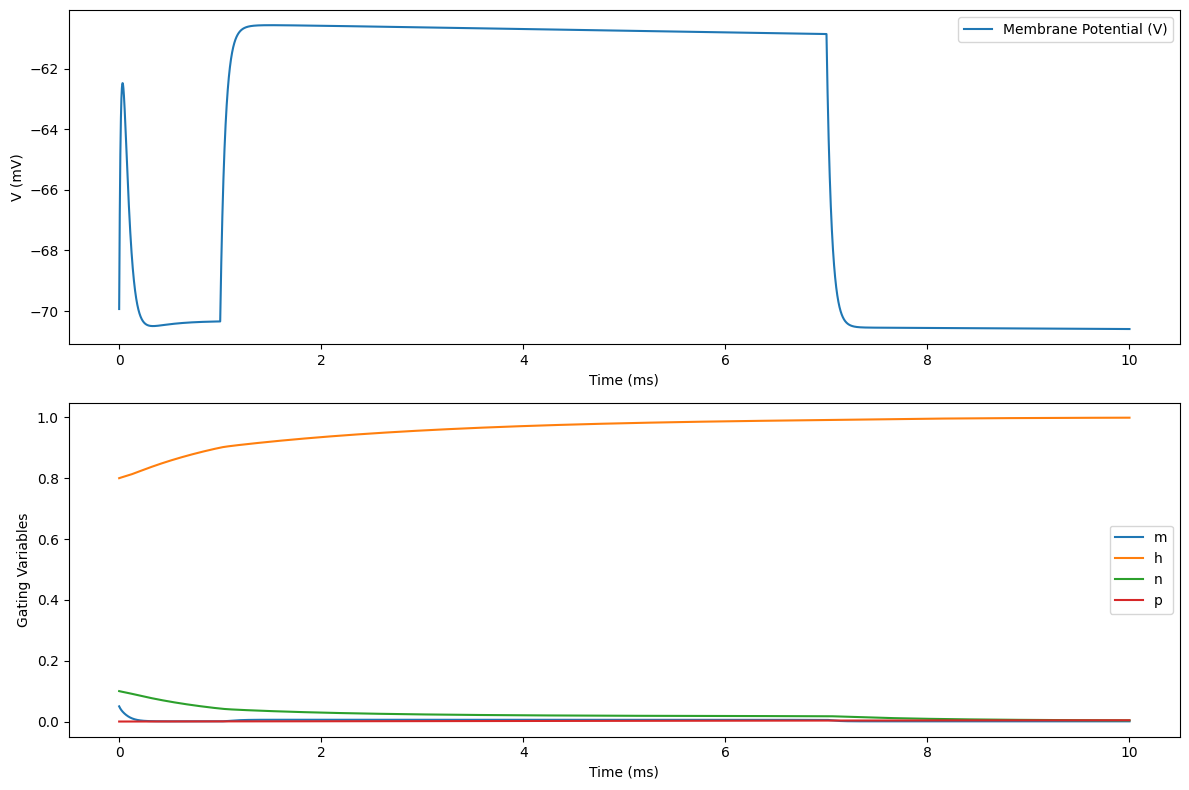

In [114]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, V_trace, label='Membrane Potential (V)')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, m_trace, label='m')
plt.plot(time, h_trace, label='h')
plt.plot(time, n_trace, label='n')
plt.plot(time, p_trace, label='p')
plt.xlabel('Time (ms)')
plt.ylabel('Gating Variables')
plt.legend()

plt.tight_layout()
plt.show()